<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/mall_customers_clustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customers Clustering Project

## Overview
This project focuses on analyzing customer shopping data from a mall to perform exploratory data analysis (EDA) and cluster customers using the K-means algorithm. By segmenting customers into clusters, actionable insights can be derived to improve marketing strategies, product placement, and customer experience.

---

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
3. [Clustering Methodology](#clustering-methodology)
4. [Insights and Inference](#insights-and-inference)
5. [Conclusion](#conclusion)
6. [How to Run the Project](#how-to-run-the-project)

---

## Dataset Overview
The dataset contains information about customer purchases at a shopping mall. Key columns include:
- **Age**: Age of the customer
- **Gender**: Male or Female
- **Category**: Product category purchased
- **Price**: Amount spent
- **Quantity**: Number of items purchased
- **Payment Method**: Mode of payment (Cash, Credit Card, Debit Card)
- **Shopping Mall**: The mall where the purchase was made
- **Invoice Date**: Date of purchase

### Key Dataset Characteristics:
- No missing or duplicate values.
- Balanced dataset ready for analysis.

---

## Exploratory Data Analysis (EDA)
### Key Findings:
1. **Payment Method Analysis**:
   - Cash is the most commonly used payment method, followed by credit cards and debit cards.

2. **Product Categories**:
   - Clothes are the most frequently purchased items.

3. **Age Distribution**:
   - A wide age range, with customers mainly between 19-40 years.

4. **Revenue Trends**:
   - Monthly, weekly, and daily revenue distributions were analyzed.
   - Initial and the last few days of the month generate significantly higher revenue, indicating potential promotional opportunities.

5. **Gender and Age Group Insights**:
   - Distribution of age groups across genders shows slight variation, but the 19-30 group dominates purchases.

### Visualizations:
EDA included histograms, count plots, and bar charts to visualize trends in customer behavior.

---

## Clustering Methodology
### Data Preprocessing:
- **Feature Scaling**: Numeric features (e.g., age, price, quantity) were standardized.
- **One-Hot Encoding**: Categorical features (e.g., gender, payment method, category) were encoded for clustering.

### K-means Clustering:
- **Elbow Method**: Determined the optimal number of clusters to be 3.
- Segmented customers into clusters based on their shopping behavior and demographics.

---

## Insights and Inference
### Cluster Analysis:
1. **Cluster 0**:
   - Represents customers with moderate spending habits.
   - Balanced distribution of genders and  higher age groups with median greater than 55.

2. **Cluster 1**:
   - Younger customers with lower spending.
   - Dominated by purchases in categories like food and accessories.

3. **Cluster 2**:
   - Customers with high spending capacity.
   - Dominated clothing and higher quantity purchases.

### Key Observations:
- **Gender Distribution**: Gender-specific trends were observed, such as male customers leaning toward specific product categories.
- **Age Impact**: Older customers tended to spend more on high-value items.
- **Category Preferences by Cluster**:
   - High-value clusters preferred categories like electronics and fashion.
   - Low-value clusters were more diverse in product choices.

---

## Conclusion
Clustering reveals actionable insights into customer behavior, allowing businesses to:
1. Tailor marketing strategies for high-value clusters.
2. Promote specific products to age groups or genders based on trends.
3. Enhance payment method options to streamline purchases.

---

## How to Run the Project
### Prerequisites:
- Python 3.x
- Required libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`

### Steps:
1. Clone this repository.
2. Install the required libraries using `pip install -r requirements.txt`.
3. Run the script `mall_customers_clustering.py` to execute the analysis and clustering.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


# Importing Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

We have no missing values and duplicate value so we dont need to impute the data

# EDA

<Axes: xlabel='price', ylabel='Count'>

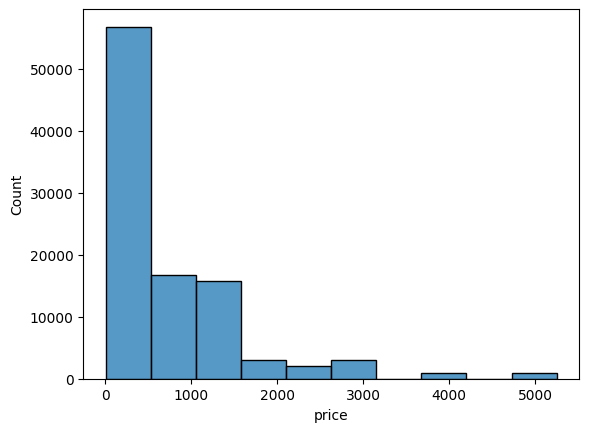

In [ ]:
sns.histplot(data=df,x='price',bins=10)

<Axes: xlabel='payment_method', ylabel='count'>

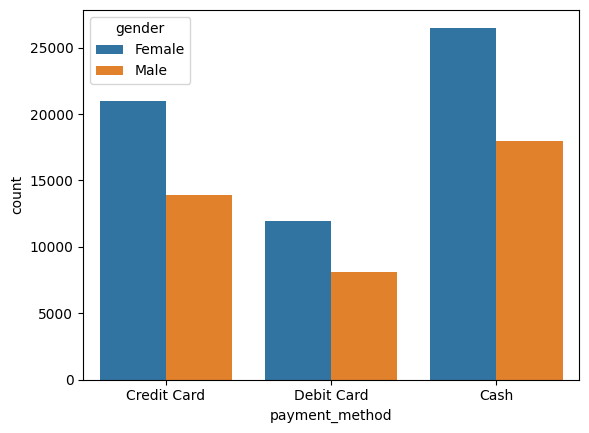

In [ ]:
sns.countplot(data=df,x='payment_method',hue='gender')

we could see that cash has been used most frequent followed by credit card and then debit card

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Food & Beverage'),
  Text(5, 0, 'Toys'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Souvenir')])

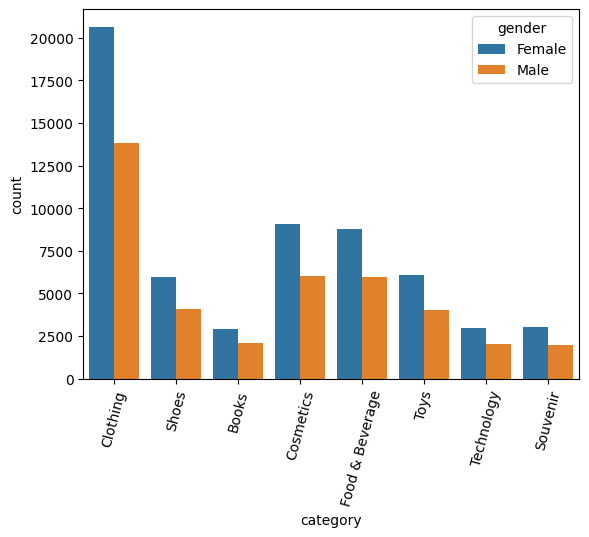

In [ ]:
sns.countplot(data=df,x='category',hue='gender')
plt.xticks(rotation=75)

This shows that cloth has been bought most frequently

<Axes: xlabel='age', ylabel='Count'>

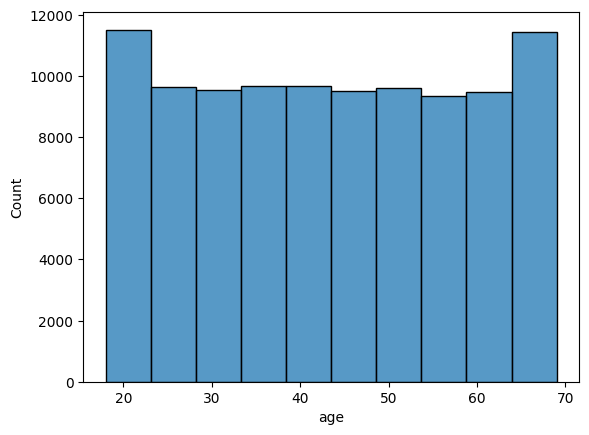

In [ ]:
sns.histplot(data=df,x='age',bins=10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

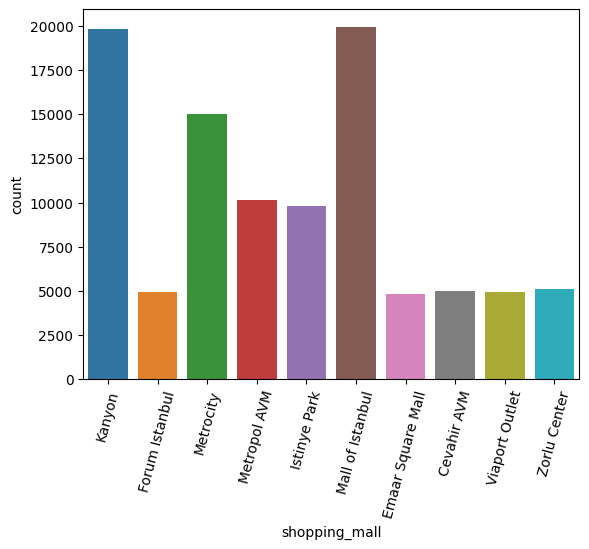

In [ ]:
sns.countplot(data=df,x='shopping_mall')
plt.xticks(rotation=75)

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')


In [ ]:
df['year']=df['invoice_date'].dt.year

In [ ]:
df['month']=df['invoice_date'].dt.month
df['day_of_week']=df['invoice_date'].dt.day_name()
df['day_of_month']=df['invoice_date'].dt.day

In [ ]:
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

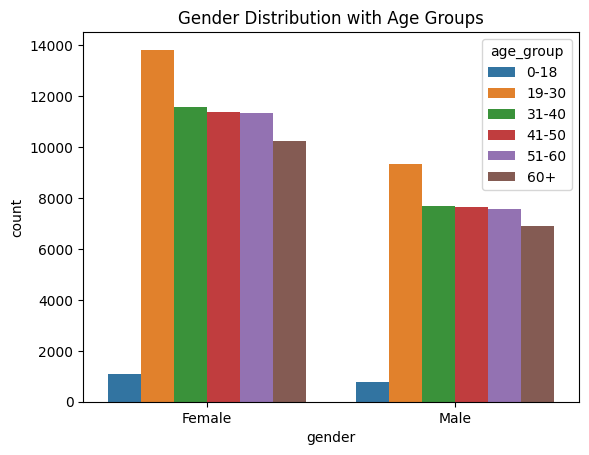

In [ ]:
sns.countplot(data=df,x='gender',hue='age_group')
plt.title('Gender Distribution with Age Groups')
plt.show()

In [ ]:
month_data=df.groupby('month')[['price','quantity']].sum().reset_index()
month_data

,month,price,quantity
0,1,7932626.63,34763
1,2,7235297.32,31343
2,3,6007346.21,26224
3,4,5102478.76,22558
4,5,5346926.82,23217
5,6,5160345.74,22674
6,7,5552023.57,23699
7,8,5270542.03,22921
8,9,5115214.27,22098
9,10,5538258.09,23477


Text(0.5, 1.0, 'Revenue Distribution over Month')

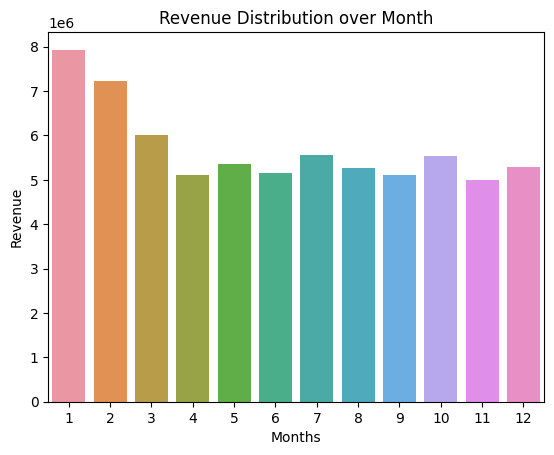

In [ ]:
sns.barplot(data=month_data,x='month',y='price')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Revenue Distribution over Month')

In [ ]:
day_name_data=df.groupby('day_of_week')['price'].sum().reset_index()
date_month_data=df.groupby('day_of_month')['price'].sum().reset_index()

Text(0.5, 1.0, 'Revenue Distribution over week')

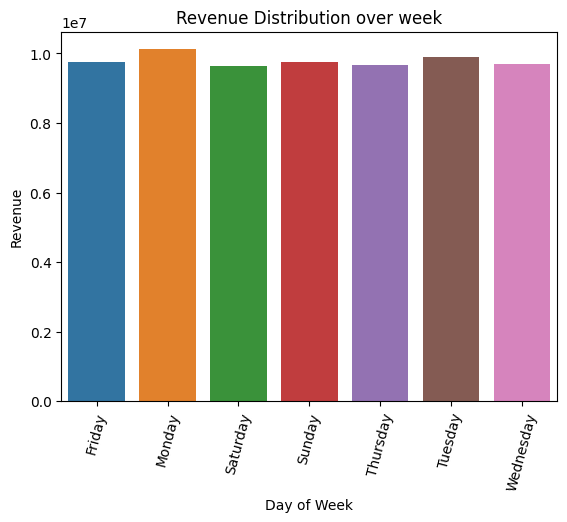

In [ ]:
sns.barplot(data=day_name_data,x='day_of_week',y='price')
plt.xlabel('Day of Week')
plt.xticks(rotation=75)
plt.ylabel('Revenue')
plt.title('Revenue Distribution over week')

In [ ]:
new_data=date_month_data.sort_values(by='price',ascending=False).reset_index()
new_data

,index,day_of_month,price
0,5,6,2390543.26
1,3,4,2368160.63
2,4,5,2360976.75
3,2,3,2360418.57
4,27,28,2333942.04
5,1,2,2323372.78
6,13,14,2292405.94
7,6,7,2285540.14
8,22,23,2270672.18
9,15,16,2270649.52


In [ ]:
new_df=new_data.nlargest(10, ['price'])
new_df

,index,day_of_month,price
0,5,6,2390543.26
1,3,4,2368160.63
2,4,5,2360976.75
3,2,3,2360418.57
4,27,28,2333942.04
5,1,2,2323372.78
6,13,14,2292405.94
7,6,7,2285540.14
8,22,23,2270672.18
9,15,16,2270649.52


Text(0.5, 1.0, 'Revenue Distribution over Days')

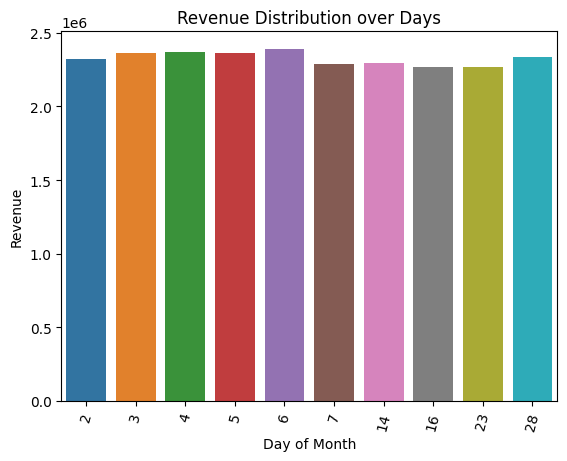

In [ ]:
sns.barplot(data=new_df,x='day_of_month',y='price')
plt.xlabel('Day of Month')
plt.xticks(rotation=75)
plt.ylabel('Revenue')
plt.title('Revenue Distribution over Days')

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,day_of_week,day_of_month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Friday,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Sunday,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Tuesday,9
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Sunday,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Sunday,24


We could do much more in EDA but for now my focus is on clustering

# Data Preprocessing

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

In [ ]:
num_cols

['age', 'quantity', 'price', 'year', 'month', 'day_of_month']

In [ ]:
cat_cols

['invoice_no',
 'customer_id',
 'gender',
 'category',
 'payment_method',
 'shopping_mall',
 'day_of_week']

In [ ]:
cat_input=['gender',
 'category',
 'payment_method',
 'shopping_mall']

In [ ]:
num_input=['age', 'quantity', 'price']

we are not predicting the sales or revenue so i am not considering date for clustering

In [ ]:
x=df[num_input + cat_input]

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(x[num_input])
x[num_input]=sc.transform(x[num_input])

## OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(x[cat_input])


OneHotEncoder()

In [ ]:
encoded_list=list(encoder.get_feature_names_out(cat_input))

In [ ]:
x.loc[:,encoded_list]=encoder.transform(x[cat_input]).toarray()

In [ ]:
x

,age,quantity,price,gender,category,payment_method,shopping_mall,gender_Female,gender_Male,category_Books,...,shopping_mall_Cevahir AVM,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
0,-1.029160,1.412984,0.861837,Female,Clothing,Credit Card,Kanyon,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.496139,-0.002426,1.180703,Male,Shoes,Debit Card,Forum Istanbul,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.562850,-1.417837,-0.413498,Male,Clothing,Cash,Metrocity,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.505867,1.412984,2.456060,Female,Shoes,Credit Card,Metropol AVM,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.638621,0.705279,-0.667945,Female,Books,Cash,Kanyon,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,0.104931,1.412984,-0.670017,Female,Souvenir,Credit Card,Kanyon,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99453,-1.095871,-0.710132,-0.721219,Male,Food & Beverage,Cash,Forum Istanbul,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99454,1.305733,-0.710132,-0.721219,Male,Food & Beverage,Debit Card,Metrocity,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99455,0.838754,0.705279,3.730152,Male,Technology,Cash,Istinye Park,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x=x[num_input + encoded_list]

# Clustering

## K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

### Elbow method for ideal cluster

In [ ]:
## we will measure the wcss which is the sum of sqaure of disatnce of the point from the centroid
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # gives the wcss value


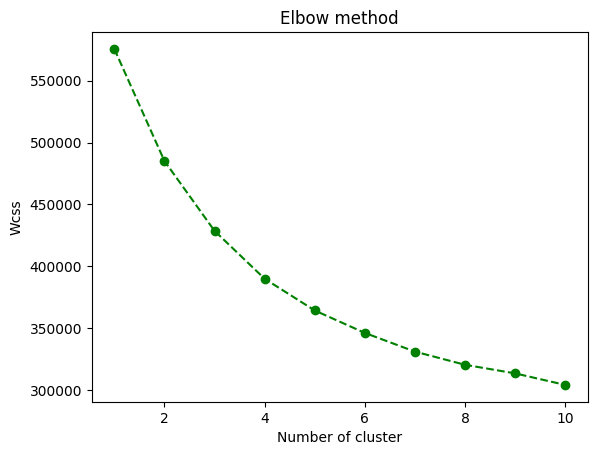

In [ ]:
# plotting the wcss vs number of cluster
plt.plot(range(1,11),wcss,'o--g')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('Elbow method')
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y=kmeans.predict(x)

In [ ]:
print(len(y))

99457


# Inference and Insights

In [ ]:
df['cluster']=y

<Axes: xlabel='cluster', ylabel='count'>

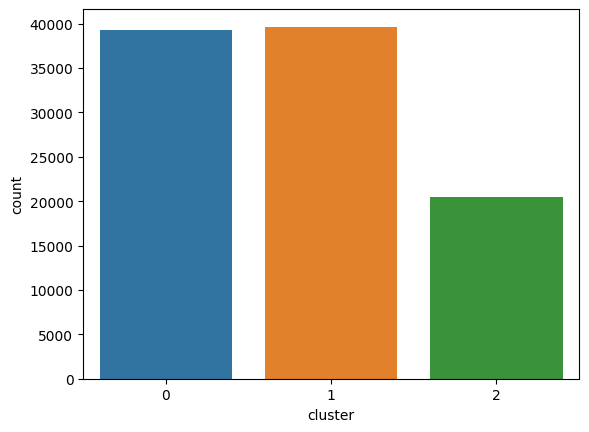

In [ ]:
sns.countplot(data=x,x='cluster')

In [ ]:
clustered_data=df.groupby('cluster')

In [ ]:
clustered_data['price'].mean()

cluster
0     323.896278
1     313.425479
2    2116.798234
Name: price, dtype: float64

we could see that cluster 2 have high average buying capacity

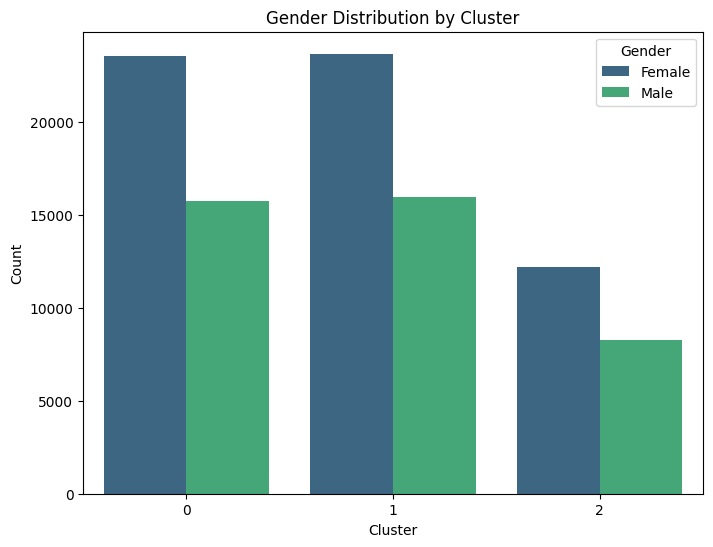

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='gender', data=df, palette='viridis')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

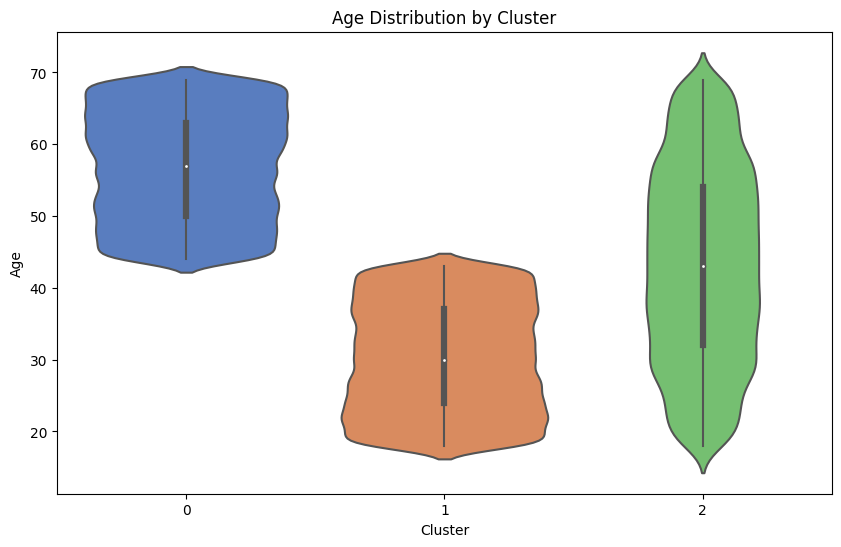

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cluster', y='age', data=df, palette='muted')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


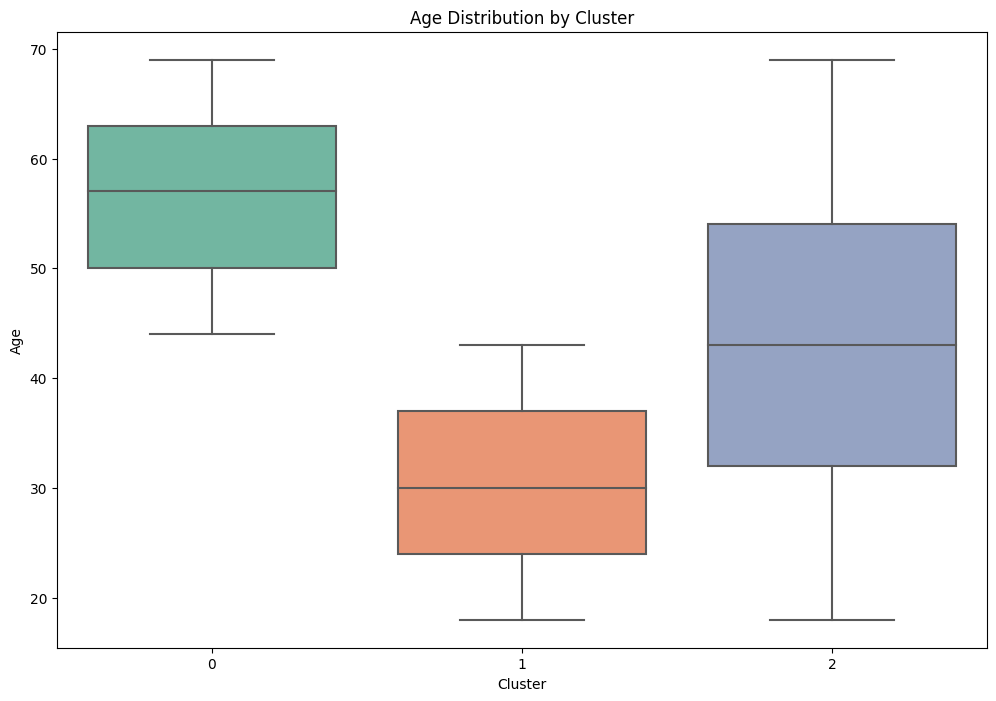

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


In [ ]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,day_of_week,day_of_month,age_group,cluster
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Friday,5,19-30,2
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Sunday,12,19-30,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Tuesday,9,19-30,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Sunday,16,60+,2
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Sunday,24,51-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9,Wednesday,21,41-50,0
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9,Wednesday,22,19-30,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3,Sunday,28,60+,0
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3,Tuesday,16,51-60,2


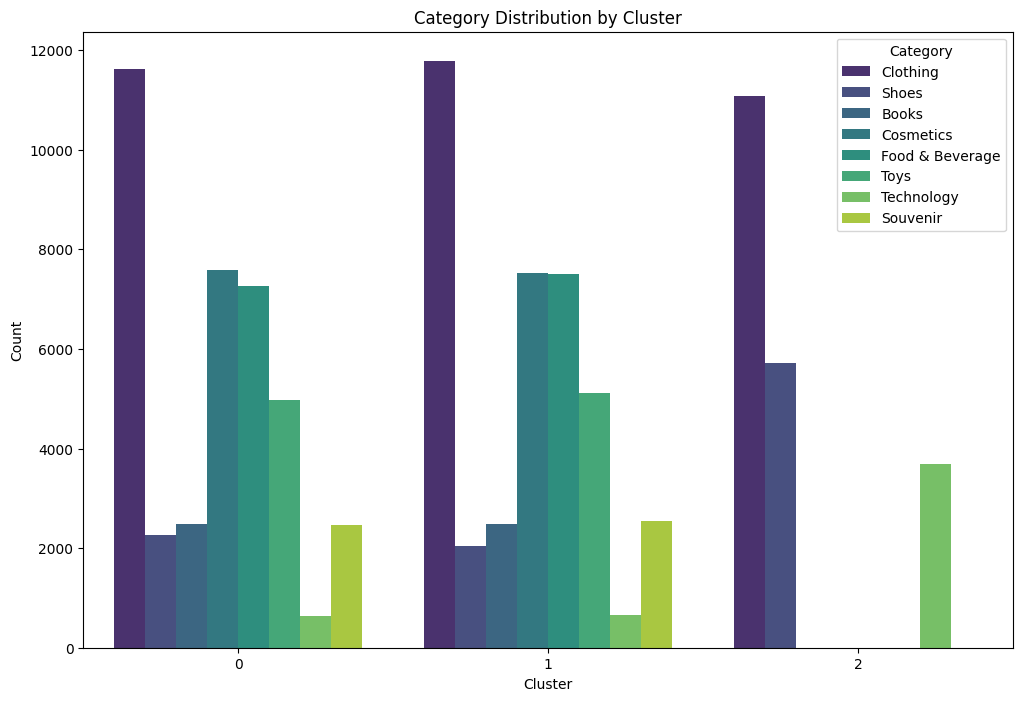

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='cluster', hue='category', data=df, palette='viridis')
plt.title('Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

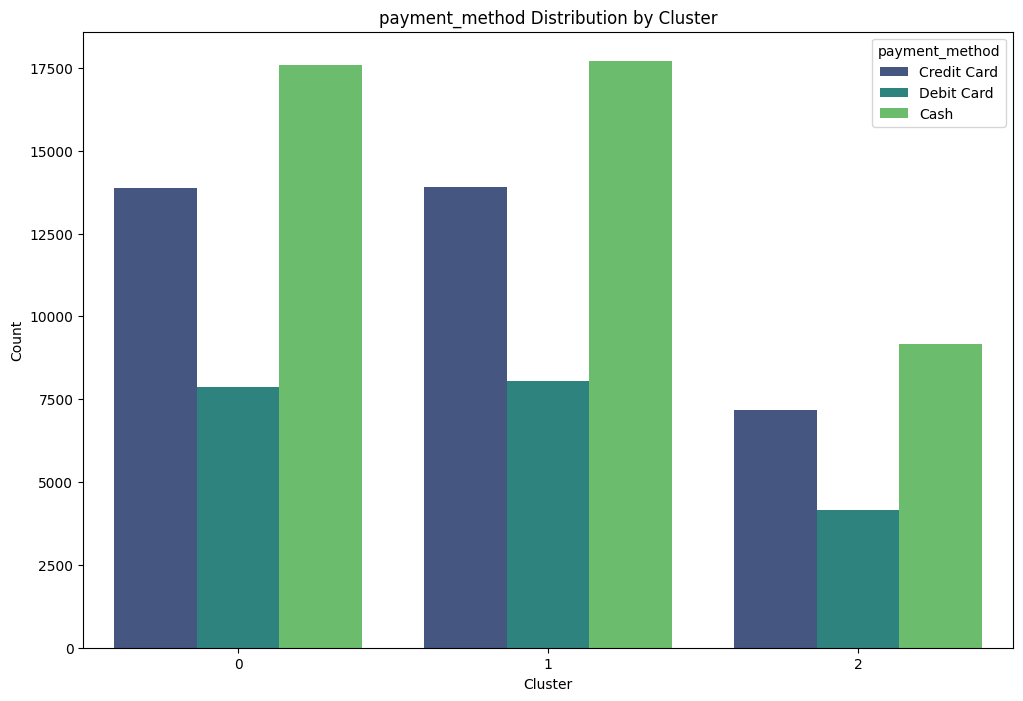

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='cluster', hue='payment_method', data=df, palette='viridis')
plt.title('payment_method Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='payment_method')
plt.show()

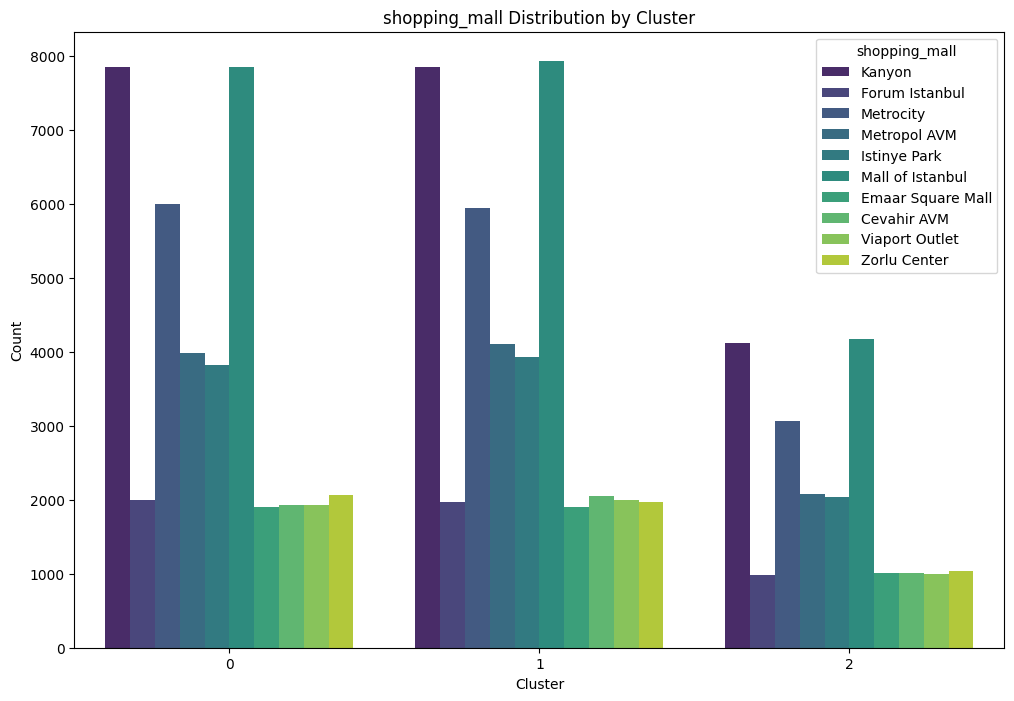

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='cluster', hue='shopping_mall', data=df, palette='viridis')
plt.title('shopping_mall Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='shopping_mall')
plt.show()